predicted=11319.423818, expected=11300.000000
predicted=11300.889031, expected=11290.000000
predicted=11291.067570, expected=11301.000000
predicted=11302.547279, expected=11359.000000
predicted=11361.675167, expected=11321.000000
predicted=11321.472987, expected=11359.000000
predicted=11361.141908, expected=11346.000000
predicted=11347.061970, expected=11346.000000
predicted=11347.341779, expected=11343.000000
predicted=11344.271642, expected=11327.000000
predicted=11327.994651, expected=11366.000000
predicted=11368.123933, expected=11326.000000
predicted=11326.556658, expected=11352.000000
predicted=11353.815003, expected=11312.000000
predicted=11312.604803, expected=11332.000000
predicted=11333.659882, expected=11317.000000
predicted=11318.049940, expected=11289.000000
predicted=11289.808207, expected=11268.000000
predicted=11268.897617, expected=11285.000000
predicted=11286.557367, expected=11249.000000
predicted=11249.630117, expected=11246.000000
predicted=11247.184221, expected=1

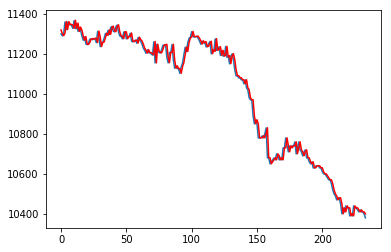

In [8]:
#https://medium.com/skyshidigital/arima-price-forecasting-by-using-parseltongue-uhmm-i-mean-python-6a40b36c6565

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

file_path = "Datasets/minyak-goreng-prices.csv"
 
def parser(x):
    splited = x.split('-')
    return datetime.strptime(splited[0] + "-" + splited[1] + "-20" +splited[2], '%d-%b-%Y')


 
# series = read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# print(series.head())
# series.plot()
# pyplot.show()

# series = read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# # autocorrelation_plot(series)
# plot_acf(series, lags=100)
# pyplot.show()

# Fix model_fit.save from statsmodel
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__

series = read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
# Split data for trainin and test 971 is number of data from previous year before 2015
size = int(971)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
#model_fit.save('model.pkl')

Date
2010-10-01    10013.0
2010-10-04    10006.0
2010-10-05    10014.0
2010-10-06    10023.0
2010-10-07    10026.0
Name: Prices, dtype: float64


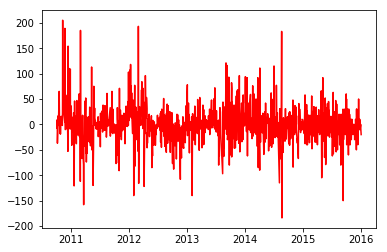

In [11]:
# Integrated (I) or ARIMA: To predict future price, it would be more accurate if our data is stationary meaning that our data 
# has constant mean and constant variance.
def parser(x):
    splited = x.split('-')
    return datetime.strptime(splited[0] + "-" + splited[1] + "-20" +splited[2], '%d-%b-%Y')
 
series = read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
# X = series
diff = series.diff()
# pyplot.plot(X, color='blue')
pyplot.plot(diff, color='red')
pyplot.show()

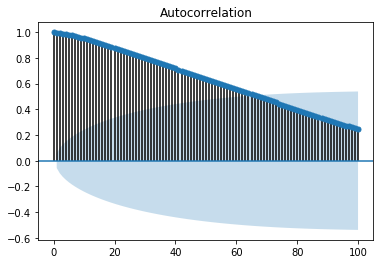

In [9]:
# This graph below illustrate the ACF for our data (limited to 100 datapoints) - used to calculate the best MA parameter
def parser(x):
    splited = x.split('-')
    return datetime.strptime(splited[0] + "-" + splited[1] + "-20" +splited[2], '%d-%b-%Y')
  
series = read_csv(file_path, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
plot_acf(series, lags=100)
pyplot.show()

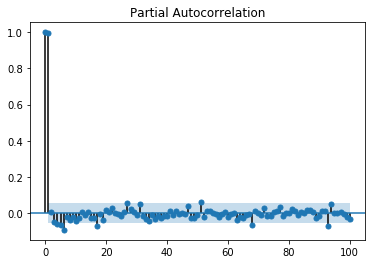

In [10]:
# This graph below illustrate the PACF for our data (limited to 100 datapoints) - used to calculate the best AR parameter
plot_pacf(series, lags=100)
pyplot.show()